![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/39123704-ea58fb38-46f8-11e8-883c-d01f27909c43.jpg"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Project assignment: Marketing Analysis

Your homework for today is to clean, normalize and analyze a dataset gathered from shopping mall customers in the San Francisco Bay area. It's a survey done in 1987, so you might expect many data-entry related errors.

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Hands on! 

The dataset is contained in `data/marketing.csv` along with a file that describes the fields (`data/marketing-description.txt`).

What inconsistencies can you find? What are the fields with more issues? How can you transform the data to be expressed in a better way? What variables are related and at what extent?

All these are the questions that you should be asking and answering.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [40]:
sns.set(rc={'figure.figsize': (18, 6)})

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">1.</span>
            Load the dataset `data/marketing.csv` as a Pandas dataframe on a variable called `df`.
        </td>
    </tr>
</table>

We don't want you to get stuck with this step. Reading and parsing CSV's with incorrect structure, encoding or separators can be tedious. Only for this step, the solution is provided. Your job is to keep completing the cells that are empty and have the `Your code goes here` comment.

In [41]:
df = pd.read_csv('data/marketing.csv', sep=';')

In [42]:
df.head()

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,AnualIncome
1,2,1,5.0,4,5,5,3,3,0,Own,1,7,?,76004
2,Male,1,5.0,5,5,5,3,5,2,Own,1,7,1,76004
3,2,1,3.0,5,1,5,2,3,1,Rent,3,7,1,34000
4,2,5,1.0,2,6,5,1,4,2,Live with Parents/Family,1,7,1,9136
5,2,5,1.0,2,6,3,1,4,2,Live with Parents/Family,1,7,1,9136


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">2.</span>
            Check if there is any null value on the dataframe.
        </td>
    </tr>
</table>

> ⚠️ <i>Sometimes null values are represented by special characters, check <b>unique values</b> to find them.</i>

In [43]:
# Your code goes here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8993 entries, 1 to 8993
Data columns (total 14 columns):
Sex                 8990 non-null object
MaritalStatus       8991 non-null object
Age                 8991 non-null float64
Education           8992 non-null object
Occupation          8981 non-null object
YearsInSf           8993 non-null object
DualIncome          8993 non-null int64
HouseholdMembers    8989 non-null object
Under18             8993 non-null int64
HouseholdStatus     8990 non-null object
TypeOfHome          8993 non-null object
EthnicClass         8989 non-null object
Language            8992 non-null object
AnualIncome         8987 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB


In [44]:
df.isna().sum()

Sex                  3
MaritalStatus        2
Age                  2
Education            1
Occupation          12
YearsInSf            0
DualIncome           0
HouseholdMembers     4
Under18              0
HouseholdStatus      3
TypeOfHome           0
EthnicClass          4
Language             1
AnualIncome          6
dtype: int64

In [45]:
for col in df.columns:
    
    print("column {} Unique Values: {}".format(col,df[col].unique()))

column Sex Unique Values: ['2' 'Male' '8' nan '9']
column MaritalStatus Unique Values: ['1' '5' '3' '2' '4' '?' nan]
column Age Unique Values: [ 5.  3.  1.  6.  2.  7.  4. nan]
column Education Unique Values: ['4' '5' '2' '3' '6' nan '1' '?']
column Occupation Unique Values: ['5' '1' '6' '8' '9' '3' '2' '?' nan '4' '7']
column YearsInSf Unique Values: ['5' '3' '4' '2' '1' '?']
column DualIncome Unique Values: [3 2 1]
column HouseholdMembers Unique Values: ['3' '5' '4' '2' '1' nan '6' '?' '7' '8' '9']
column Under18 Unique Values: [0 2 1 3 4 5 6 8 7 9]
column HouseholdStatus Unique Values: ['Own' 'Rent' 'Live with Parents/Family' nan '?' 'Rental'
 'Live with Parents' 'Live with Family' 'Live with Fam']
column TypeOfHome Unique Values: ['1' '3' '5' '2' '4' '?']
column EthnicClass Unique Values: ['7' '5' '2' '3' '8' '4' '1' '?' '6' nan]
column Language Unique Values: ['?' '1' '2' '3' nan]
column AnualIncome Unique Values: ['76004' '34000' '9136' '66994' '32171' '11703' '21672' '46894'
 '7

In [46]:
df1.MaritalStatus.value_counts()

5    2802
1    2640
3     668
2     534
4     201
Name: MaritalStatus, dtype: int64

In [47]:
df.MaritalStatus.value_counts()

5    3654
1    3333
3     874
2     668
4     302
?     160
Name: MaritalStatus, dtype: int64

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">3.</span>
            Remove the rows that contain invalid values.
        </td>
    </tr>
</table>

In [48]:
# Your code goes here

df1= df.replace('?',np.nan)
df1.Sex=df1.Sex.replace({'Male':'1','8':np.nan,'9':np.nan})

df1=df1.dropna()

In [49]:
for col in df1.columns:
    
    print("column {} Unique Values: {}".format(col,df1[col].unique()))

column Sex Unique Values: ['1' '2']
column MaritalStatus Unique Values: ['1' '5' '3' '2' '4']
column Age Unique Values: [5. 3. 1. 6. 2. 7. 4.]
column Education Unique Values: ['5' '2' '4' '3' '6' '1']
column Occupation Unique Values: ['5' '1' '6' '8' '9' '3' '2' '4' '7']
column YearsInSf Unique Values: ['5' '3' '4' '2' '1']
column DualIncome Unique Values: [3 2 1]
column HouseholdMembers Unique Values: ['5' '3' '4' '2' '1' '6' '7' '9' '8']
column Under18 Unique Values: [2 1 0 3 4 5 6 8 7 9]
column HouseholdStatus Unique Values: ['Own' 'Rent' 'Live with Parents/Family' 'Rental' 'Live with Parents'
 'Live with Family' 'Live with Fam']
column TypeOfHome Unique Values: ['1' '3' '5' '2' '4']
column EthnicClass Unique Values: ['7' '5' '2' '3' '4' '8' '1' '6']
column Language Unique Values: ['1' '3' '2']
column AnualIncome Unique Values: ['76004' '34000' '9136' '66994' '32171' '11703' '21672' '46894' '27591'
 '19997' '253600' '7' '7540' '91000000000036' '5740' '460' '2460' '9460'
 '150500' '7

In [50]:
df1.isna().sum()

Sex                 0
MaritalStatus       0
Age                 0
Education           0
Occupation          0
YearsInSf           0
DualIncome          0
HouseholdMembers    0
Under18             0
HouseholdStatus     0
TypeOfHome          0
EthnicClass         0
Language            0
AnualIncome         0
dtype: int64

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">4.</span>
            Show <b>basic descriptive statistics</b> (mean, mix, max...) of the data.
        </td>
    </tr>
</table>

In [51]:
# Your code goes here

df1.describe()

,Age,DualIncome,Under18
count,6845.000000,6845.000000,6845.000000
mean,3.407889,1.549744,0.688240
std,1.609857,0.737680,1.082828
min,1.000000,1.000000,0.000000
25%,2.000000,1.000000,0.000000
50%,3.000000,1.000000,0.000000
75%,4.000000,2.000000,1.000000
max,7.000000,3.000000,9.000000


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">5.</span>
            Show a boxplot of `AnualIncome` variable.
        </td>
    </tr>
</table>

In [53]:
# Your code goes here

df1.AnualIncome=df1.AnualIncome.apply(pd.to_numeric,errors='coerce')

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6845 entries, 2 to 8993
Data columns (total 14 columns):
Sex                 6845 non-null object
MaritalStatus       6845 non-null object
Age                 6845 non-null float64
Education           6845 non-null object
Occupation          6845 non-null object
YearsInSf           6845 non-null object
DualIncome          6845 non-null int64
HouseholdMembers    6845 non-null object
Under18             6845 non-null int64
HouseholdStatus     6845 non-null object
TypeOfHome          6845 non-null object
EthnicClass         6845 non-null object
Language            6845 non-null object
AnualIncome         6845 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 1.1+ MB


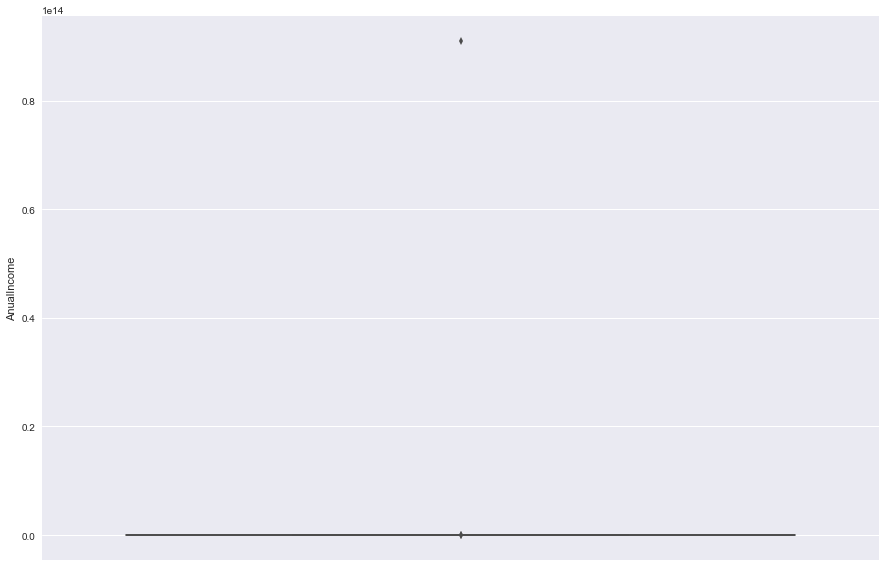

In [61]:
fig, ax = plt.subplots(figsize=(15, 10))
ax=sns.boxplot(y="AnualIncome",data=df1)

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">6.</span>
            Identify outlier values on `AnualIncome` and remove them.
        </td>
    </tr>
</table>

In [66]:
# Your code goes here
df1.AnualIncome.unique()
outlier=df1[df1.AnualIncome>100000]
df1=df1[df1.AnualIncome<100000]

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6842 entries, 2 to 8993
Data columns (total 14 columns):
Sex                 6842 non-null object
MaritalStatus       6842 non-null object
Age                 6842 non-null float64
Education           6842 non-null object
Occupation          6842 non-null object
YearsInSf           6842 non-null object
DualIncome          6842 non-null int64
HouseholdMembers    6842 non-null object
Under18             6842 non-null int64
HouseholdStatus     6842 non-null object
TypeOfHome          6842 non-null object
EthnicClass         6842 non-null object
Language            6842 non-null object
AnualIncome         6842 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 801.8+ KB


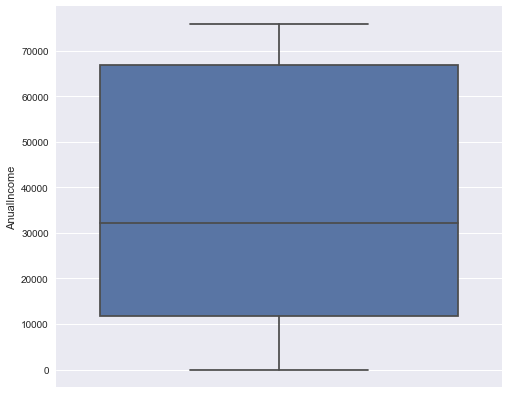

In [72]:
fig, ax = plt.subplots(figsize=(8, 7))
ax=sns.boxplot(y="AnualIncome",data=df1)

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">7.</span>
            Show two different `countplot` for `Sex` and `Education` variables.
        </td>
    </tr>
</table>

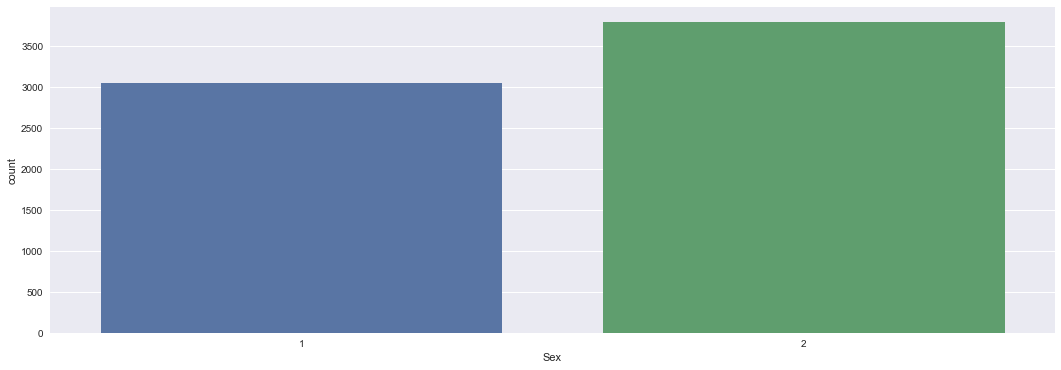

In [87]:
# Your code goes here

# fig, ax = plt.subplots(2,figsize=(10, 7),sharey=True)
# sns.countplot(x="Sex",data=df1,ax=ax[0])
# sns.countplot(x="Education",data=df1,ax=ax[1])
sns.countplot(data=df1, x='Sex')

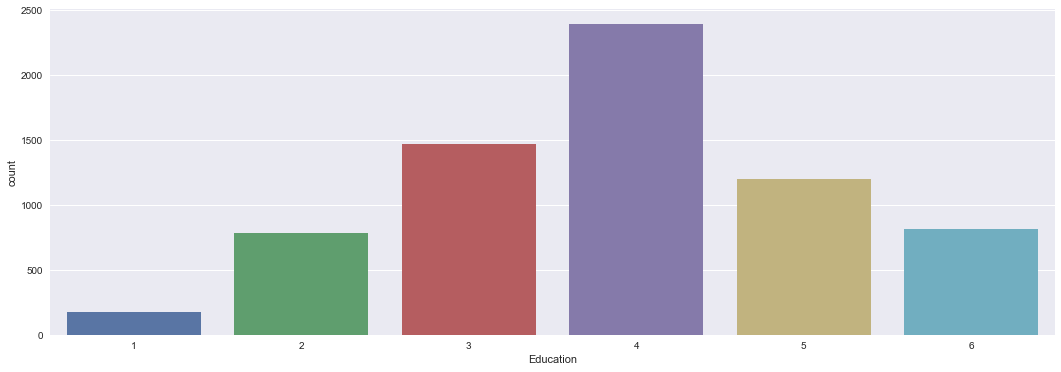

In [88]:
# Your code goes here
sns.countplot(data=df1, x='Education')


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">8.</span>
            Show only `Sex` and `HouseholdStatus` of the first 20 observations.
        </td>
    </tr>
</table>

In [89]:
# Your code goes here

df1.loc[:,['Sex','HouseholdStatus']].head(20)

,Sex,HouseholdStatus
2,1,Own
3,2,Rent
4,2,Live with Parents/Family
5,2,Live with Parents/Family
6,1,Own
7,1,Rent
8,1,Rent
9,1,Rent
10,1,Rent
11,1,Rent


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">9.</span>
            Show only `MaritalStatus` of the observations in position 247.
        </td>
    </tr>
</table>

In [93]:
# Your code goes here

df1.iloc[247,:].MaritalStatus

'1'

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">10.</span>
            How many males answered the survey?
        </td>
    </tr>
</table>

In [98]:
# Your code goes here

df1[df1.Sex=='1'].Sex.count()

3049

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">11.</span>
            How many people "Live with Parents/Family"?
        </td>
    </tr>
</table>

> ⚠️ <i>Remember "Live with Parents/Family" is on `HouseholdStatus` column.</i>

In [100]:
# Your code goes here

df1[df1.HouseholdStatus=='Live with Parents/Family'].HouseholdStatus.count()

1394

---

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Optional exercises

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">12.</span>
            What is the most common `EthnicClass`?
        </td>
    </tr>
</table>

In [101]:
# Your code goes here

df1.EthnicClass.value_counts()

7    4577
5     870
3     630
2     379
8     175
1     111
6      88
4      12
Name: EthnicClass, dtype: int64

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">13.</span>
            Which occupation gets the highest anual income?
        </td>
    </tr>
</table>

In [108]:
# parse AnualIncome as int
# df['AnualIncome'] = df['AnualIncome'].apply(int)

# Your code goes here

df1.groupby('Occupation')['Occupation','AnualIncome'].sum().sort_values(by='AnualIncome',ascending=False)

,AnualIncome
Occupation,
1,112422062
4,26058933
6,22635572
5,20808179
2,20156323
8,17567999
3,17262711
9,5489970
7,4075155


![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)